导入必要的库和加载数据

In [7]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial01.csv")
# Disable logging messages unless there is an error

NeuralProphet 默认启用了 和 Trend Seasonality 组件。在第二个教程中，我们将更详细地探索该 Trend 组件，并从其最基本的配置开始。因此，我们现在将禁用该 Seasonality 组件并将变更点的 Trend 数量设置为 0

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

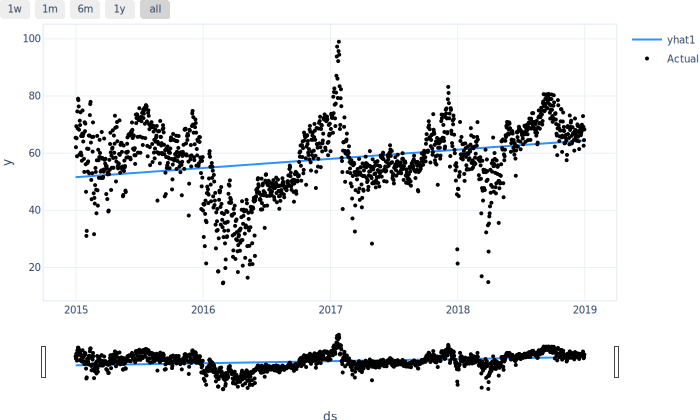

In [10]:
# Model and prediction
m = NeuralProphet(
    # Disable change trendpoints
    n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

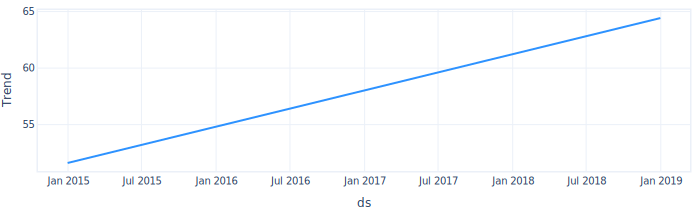

In [12]:
m.plot_components(forecast, components=["trend"])

使用趋势理论模型来预测未来的趋势，并查看我们的趋势线将如何继续

Predicting: |          | 0/? [00:00<?, ?it/s]

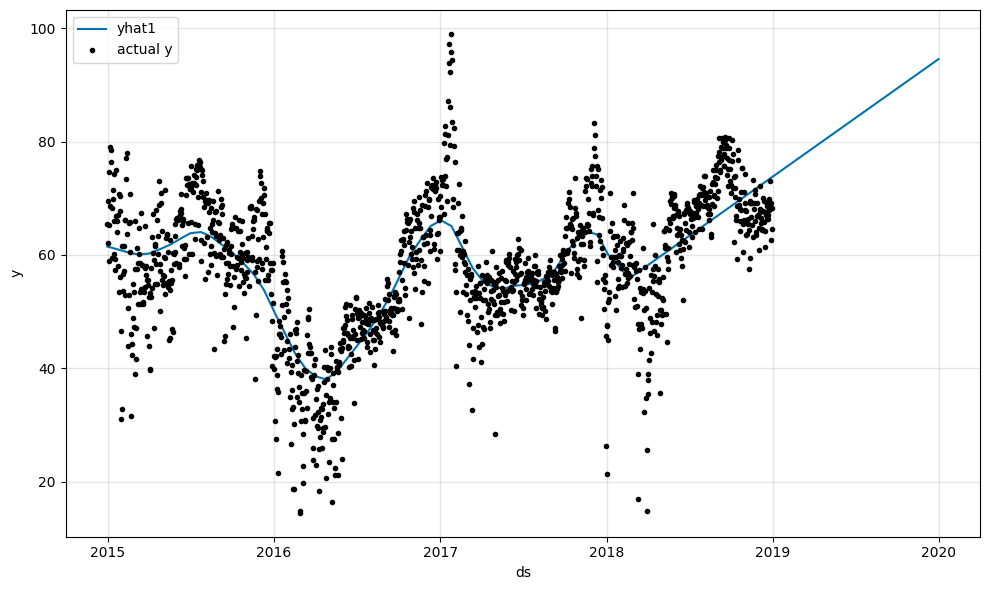

In [17]:
df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

取消禁用趋势变化点

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

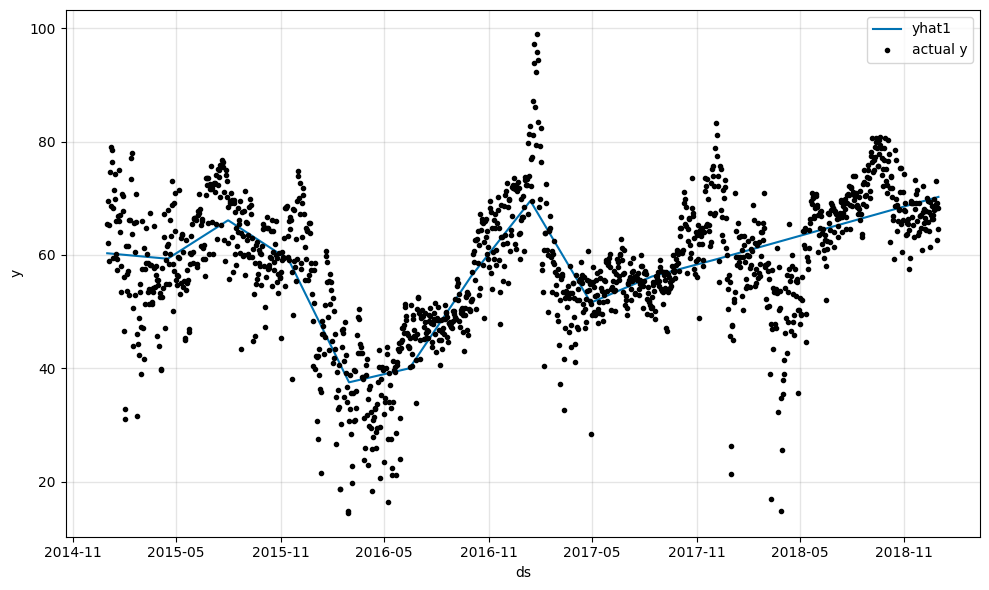

In [14]:
# Model and prediction
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    # n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

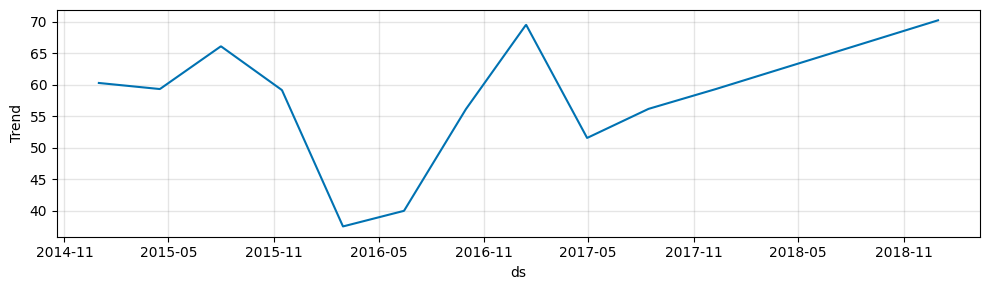

In [15]:
m.plot_parameters(components=["trend"])

增加趋势点变化数量到50

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

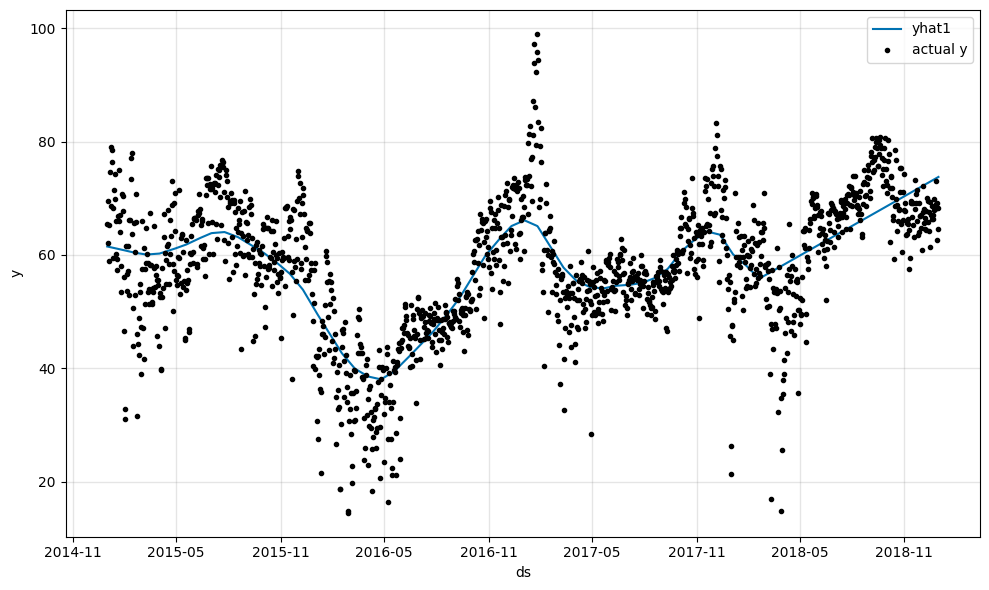

In [16]:
# Model and prediction
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    n_changepoints=50,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)